# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [461]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [462]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [463]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [464]:
sinasc_raw.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [465]:
sinasc_copy = sinasc_raw.copy()

In [466]:
sinasc_copy["latitudes"] = pd.cut(sinasc_copy['munResLat'],[-30, -10.5,30 ])

In [467]:
(sinasc_copy.groupby('latitudes')[['PARIDADE','QTDGESTANT']]
 .agg([('min','min'),('máx','max'),('média',np.mean)
           ,('soma','sum' ),('mediana',np.median),("desvio padrão",np.std),("variância",np.var)]))

PARIDADE                                                      \
                    min máx     média  soma mediana desvio padrão variância   
latitudes                                                                     
(-30.0, -10.5]        0   1  0.651582  8466     1.0      0.476488  0.227040   
(-10.5, 30.0]         0   1  0.646145  9068     1.0      0.478182  0.228658   

               QTDGESTANT                                                 \
                      min   máx     média     soma mediana desvio padrão   
latitudes                                                                  
(-30.0, -10.5]        0.0  15.0  1.186032  15301.0     1.0      1.304777   
(-10.5, 30.0]         0.0  52.0  1.364024  17615.0     1.0      1.492482   

                          
               variância  
latitudes                 
(-30.0, -10.5]  1.702444  
(-10.5, 30.0]   2.227501

 ### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [468]:
sinasc_copy['area_municipios'] = pd.cut(sinasc_copy['munResArea'],[0,3000,float('inf')])

In [469]:
(sinasc_copy.groupby('area_municipios')[['CONSPRENAT','CONSULTAS']].agg([('min','min'),('máx','max'),('média',np.mean)
                                                  ,('soma','sum' ),('mediana',np.median),("desvio padrão",np.std),("variância",np.var)]))

CONSPRENAT                                                  \
                       min   máx     média      soma mediana desvio padrão   
area_municipios                                                              
(0.0, 3000.0]          0.0  99.0  8.709395   44775.0     8.0      4.290017   
(3000.0, inf]          0.0  99.0  8.143825  170662.0     8.0      5.325530   

                           CONSULTAS                               \
                 variância       min máx     média   soma mediana   
area_municipios                                                     
(0.0, 3000.0]    18.404248         1   9  3.740180  19520     4.0   
(3000.0, inf]    28.361275         1   9  3.537326  77142     4.0   

                                         
                desvio padrão variância  
area_municipios                          
(0.0, 3000.0]        0.607492  0.369046  
(3000.0, inf]        0.820967  0.673986

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [470]:
sinasc_copy['munResAlt'] = pd.cut(sinasc_copy['munResAlt'],[-10, 339, float('inf')])

In [471]:
(sinasc_copy.groupby('munResAlt')[['munResLon','munResLat']].agg([('min','min'),('máx','max'),('média',np.mean)
                                                                      ,('soma','sum' ),('mediana',np.median),("desvio padrão",np.std),("variância",np.var)]))

munResLon                                               \
                     min       máx      média          soma   mediana   
munResAlt                                                               
(-10.0, 339.0] -65.32915 -60.54431 -62.958543 -1.568108e+06 -63.03327   
(339.0, inf]   -61.85308 -60.13858 -60.363491 -1.279706e+05 -60.13858   

                                       munResLat                       \
               desvio padrão variância       min       máx      média   
munResAlt                                                               
(-10.0, 339.0]      1.096073  1.201376 -13.49976  -8.76889 -10.178450   
(339.0, inf]        0.474426  0.225080 -13.13056 -12.13178 -12.722274   

                                                                
                        soma   mediana desvio padrão variância  
munResAlt                                                       
(-10.0, 339.0] -253514.65526 -10.26310      1.238555  1.534018  
(339.0, inf]    -26971.22034 -12.74137      0.211049  0.044542

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [472]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [473]:
sinasc_copy['DTNASC'] = pd.to_datetime(sinasc_copy['DTNASC']).dt.strftime("%b")

In [474]:
sinasc_copy = sinasc_copy.set_index(['munResNome'])

In [475]:
sinasc = sinasc_copy.groupby([imediatas, 'IDADEMAE', 'DTNASC']).mean(numeric_only=True)
sinasc

ORIGEM   CODESTAB     CODMUNNASC  LOCNASC  \
munResNome IDADEMAE DTNASC                                              
Ariquemes  11       Mar        1.0  4001303.0  110020.000000      1.0   
           13       Jul        1.0  2494299.0  110002.000000      1.0   
                    May        1.0  2494299.0  110002.000000      1.0   
           14       Apr        1.0  5279343.0  110030.666667      1.0   
                    Dec        1.0  2515598.0  110002.000000      1.0   
...                            ...        ...            ...      ...   
Vilhena    43       Oct        1.0  2657236.5  110030.000000      1.0   
           44       Aug        1.0  2515989.0  110030.000000      1.0   
           46       Nov        1.0  2798484.0  110030.000000      1.0   
           47       Oct        1.0  2798484.0  110030.000000      1.0   
           53       Sep        1.0  2798484.0  110030.000000      1.0   

                            ESTCIVMAE     CODOCUPMAE  QTDFILVIVO  QTDFILMORT  \
munResNome IDADEMAE DTNASC                                                     
Ariquemes  11       Mar      1.000000  999992.000000         NaN         NaN   
           13       Jul      1.000000  999991.000000         0.0         0.0   
                    May      1.000000  999992.000000         0.0         0.0   
           14       Apr      2.333333  999991.333333         0.0         0.0   
                    Dec      1.000000  999992.000000         1.0         0.0   
...                               ...            ...         ...         ...   
Vilhena    43       Oct      2.000000  615598.500000         1.0         1.5   
           44       Aug      2.000000  141505.000000         0.0         1.0   
           46       Nov      2.000000  999992.000000         0.0         0.0   
           47       Oct      2.000000  622020.000000         1.0         0.0   
           53       Sep      2.000000  999992.000000         0.0         0.0   

                            CODMUNRES  CONSULTAS  ...  STDNEPIDEM  STDNNOVA  \
munResNome IDADEMAE DTNASC                        ...                         
Ariquemes  11       Mar      110040.0   4.000000  ...         0.0       1.0   
           13       Jul      110002.0   2.000000  ...         0.0       1.0   
                    May      110070.0   2.000000  ...         0.0       1.0   
           14       Apr      110047.0   3.666667  ...         0.0       1.0   
                    Dec      110002.0   4.000000  ...         0.0       1.0   
...                               ...        ...  ...         ...       ...   
Vilhena    43       Oct      110018.5   3.500000  ...         0.0       1.0   
           44       Aug      110030.0   4.000000  ...         0.0       1.0   
           46       Nov      110030.0   4.000000  ...         0.0       1.0   
           47       Oct      110006.0   4.000000  ...         0.0       1.0   
           53       Sep      110005.0   1.000000  ...         0.0       1.0   

                            CODPAISRES   TPROBSON  PARIDADE  KOTELCHUCK  \
munResNome IDADEMAE DTNASC                                                
Ariquemes  11       Mar            1.0   2.000000       0.0    9.000000   
           13       Jul            1.0  10.000000       0.0    3.000000   
                    May            1.0   1.000000       0.0    2.000000   
           14       Apr            1.0   5.666667       0.0    4.333333   
                    Dec            1.0   5.000000       1.0    5.000000   
...                                ...        ...       ...         ...   
Vilhena    43       Oct            1.0   4.500000       1.0    4.500000   
           44       Aug            1.0   3.000000       1.0    5.000000   
           46       Nov            1.0   2.000000       0.0    2.000000   
           47       Oct            1.0   3.000000       1.0    5.000000   
           53       Sep            1.0   1.000000       0.0    9.000000   

                                C

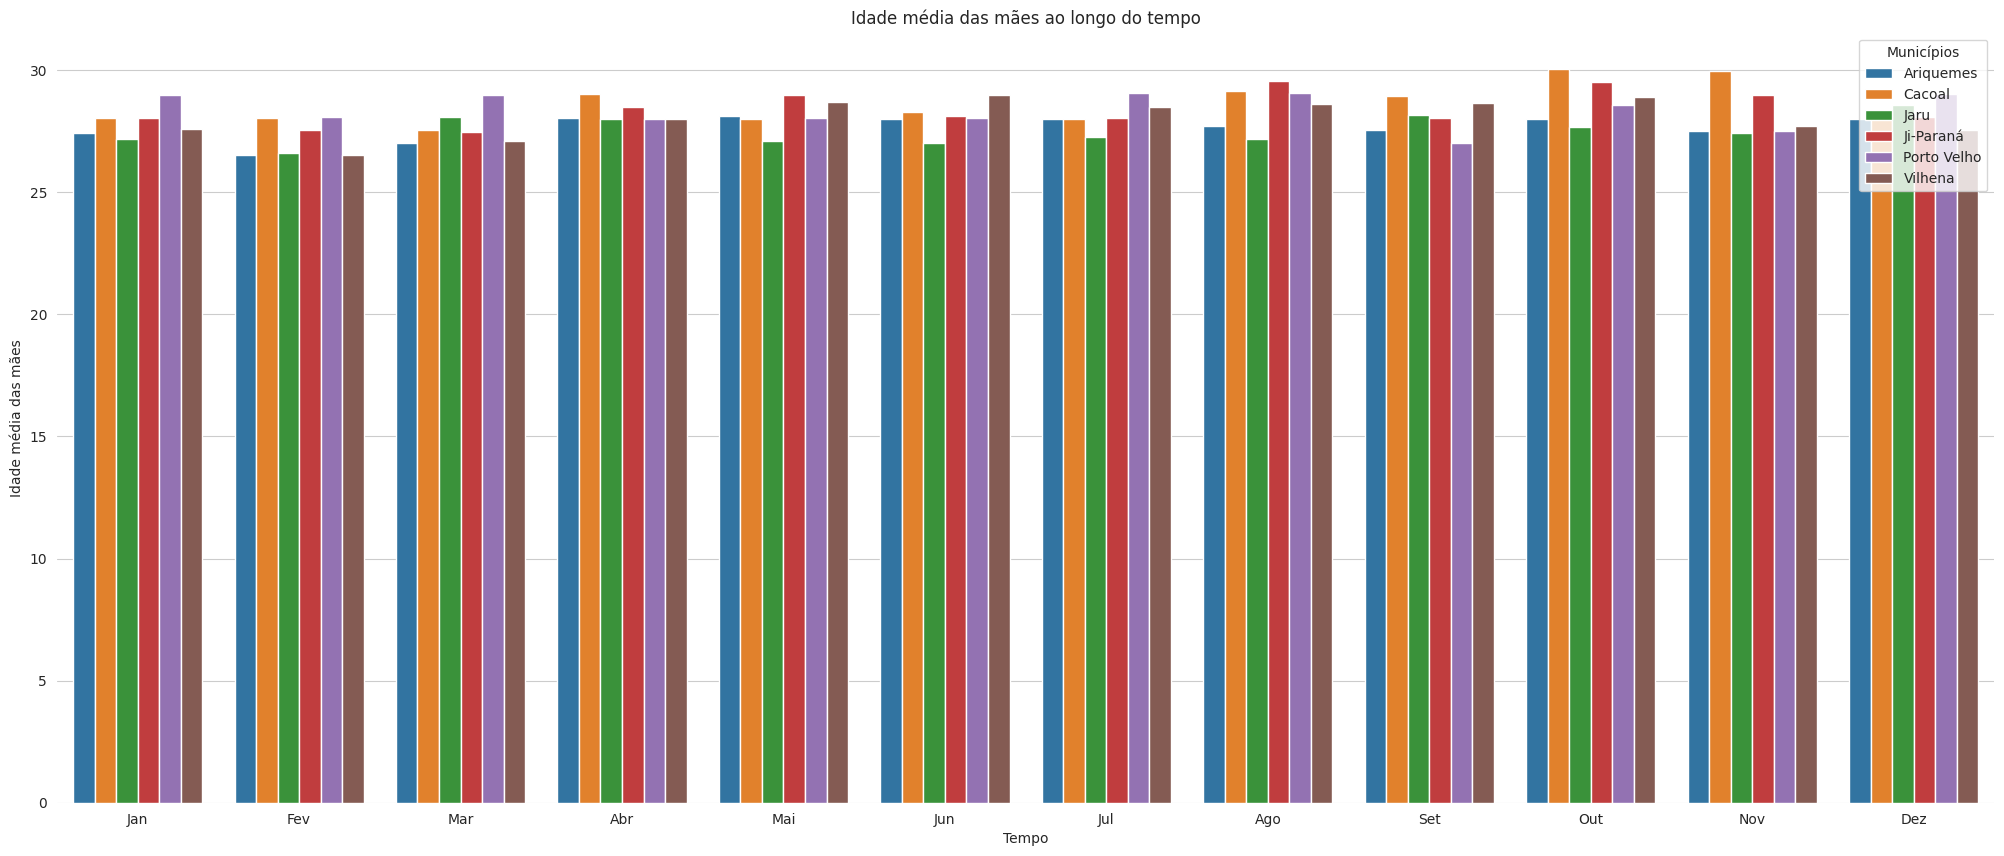

In [476]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Criando o gráfico
fig = sns.barplot(data=sinasc ,y="IDADEMAE", x="DTNASC", hue="munResNome", errorbar=None)

# Ajustando o tamanho do gráfico
fig.figure.set_size_inches(25, 10)

# Adicionando título e rótulos aos eixos
plt.title("Idade média das mães ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("Idade média das mães")
plt.legend(title="Municípios")

# Ajustando os rótulos do eixo x
meses = ['Jan', 'Fev', 'Mar','Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(fig.get_xticks(), meses)

# Removendo linhas desnecessárias da grade
sns.despine(left=True, bottom=True)

# Exibindo o gráfico
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


Índice de Desenvolvimento Humano (IDH):
é um indicador que mede e avalia o desenvolvimento de um país.
O IDH analisa o nível de qualidade de vida e bem-estar de uma população, e mostra a eficiência das políticas públicas

In [477]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')

In [478]:
dados_ro.loc[(dados_ro['idh'] >= 0.800), 'IDH_Class'] = 'IDH Muito Alto'
dados_ro.loc[(dados_ro['idh'] >= 0.700) & (dados_ro['idh'] <= 0.799) , 'IDH_Class'] = 'IDH Alto'
dados_ro.loc[(dados_ro['idh'] >= 0.600) & (dados_ro['idh'] <= 0.699) , 'IDH_Class'] = 'IDH Médio'
dados_ro.loc[(dados_ro['idh'] >= 0.500) & (dados_ro['idh'] <= 0.599) , 'IDH_Class'] = 'IDH Baixo'
dados_ro.loc[(dados_ro['idh'] >= 0.400) & (dados_ro['idh'] <= 0.499) , 'IDH_Class'] = 'IDH Muito Baixo'

In [479]:
idh_ro= dados_ro.set_index('IDH_Class')
idh_ro

,municipio,regiao,idh,ifdm,pib
IDH_Class,,,,,
IDH Médio,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
IDH Baixo,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
IDH Médio,Alto Paraíso,Ariquemes,0.625,0.5735,358000
IDH Médio,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
IDH Alto,Ariquemes,Ariquemes,0.702,0.7746,2579830
IDH Médio,Buritis,Ariquemes,0.616,0.6199,726000
IDH Médio,Cabixi,Vilhena,0.650,0.5887,113031
IDH Médio,Cacaulândia,Ariquemes,0.646,0.5721,116635
IDH Alto,Cacoal,Cacoal,0.718,0.7111,2261644


In [480]:
dados_ro.groupby('IDH_Class').aggregate({'idh': ['min', 'mean', 'max'], 'ifdm': ['min', 'mean', 'max'], 'pib': ['min', 'mean', 'sum', 'max']})

idh                     ifdm                        pib  \
             min      mean    max     min      mean     max      min   
IDH_Class                                                              
IDH Alto   0.700  0.715857  0.736  0.6785  0.726629  0.7746  1164877   
IDH Baixo  0.584  0.591333  0.598  0.4562  0.532156  0.5922    92346   
IDH Médio  0.607  0.643250  0.692  0.5055  0.604097  0.6850    52908   

                                             
                   mean       sum       max  
IDH_Class                                    
IDH Alto   4.545286e+06  31817002  17912070  
IDH Baixo  2.488713e+05   2239842    633000  
IDH Médio  3.244894e+05  11681619   1500890

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


O Índice FIRJAN de Desenvolvimento Municipal (IFDM):

é um estudo anual que acompanha o desenvolvimento socioeconômico de todos os municípios brasileiros.
O IFDM analisa três áreas: emprego e renda, educação e saúde.

In [481]:
dados_ro.loc[(dados_ro['ifdm'] >= 0.8), 'IFDM_Class'] = 'Desenvolvimento alto'
dados_ro.loc[(dados_ro['ifdm'] >= 0.4) & (dados_ro['ifdm'] <= 0.6) , 'IFDM_Class'] = 'Desenvolvimento regular'
dados_ro.loc[(dados_ro['ifdm'] <= 0.4) , 'IFDM_Class'] = 'Desenvolvimento baixo'
dados_ro.loc[(dados_ro['ifdm'] >= 0.6) & (dados_ro['ifdm'] <= 0.8) , 'IFDM_Class'] = 'Moderado'

In [482]:
ifdm_ro = dados_ro.set_index('IFDM_Class')
ifdm_ro

,municipio,regiao,idh,ifdm,pib,IDH_Class
IFDM_Class,,,,,,
Moderado,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH Médio
Desenvolvimento regular,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH Baixo
Desenvolvimento regular,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH Médio
Desenvolvimento regular,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH Médio
Moderado,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH Alto
Moderado,Buritis,Ariquemes,0.616,0.6199,726000,IDH Médio
Desenvolvimento regular,Cabixi,Vilhena,0.650,0.5887,113031,IDH Médio
Desenvolvimento regular,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH Médio
Moderado,Cacoal,Cacoal,0.718,0.7111,2261644,IDH Alto


In [483]:
dados_ro.groupby('IFDM_Class').aggregate({'idh': ['min', 'mean', 'max'], 'ifdm': ['min', 'mean', 'max'], 'pib': ['min', 'mean', 'sum', 'max']})

idh                     ifdm                    \
                           min      mean    max     min      mean     max   
IFDM_Class                                                                  
Desenvolvimento regular  0.584  0.620192  0.672  0.4562  0.556362  0.5973   
Moderado                 0.607  0.667885  0.736  0.6006  0.659919  0.7746   

                           pib                                    
                           min          mean       sum       max  
IFDM_Class                                                        
Desenvolvimento regular  59779  2.503585e+05   6509320    893000  
Moderado                 52908  1.508813e+06  39229143  17912070

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


O Produto Interno Bruto (PIB):
é um indicador econômico que representa a soma de todos os bens e serviços produzidos numa determinada região

In [484]:
dados_ro.loc[(dados_ro['pib'] >= 1164877) & (dados_ro['pib'] <= 17912070), 'PIB_Class'] = 'Acima de 1 Bilhão'
dados_ro.loc[(dados_ro['pib'] >= 507000) & (dados_ro['pib'] <= 893000), 'PIB_Class'] = 'Acima de 500 Milhões'
dados_ro.loc[(dados_ro['pib'] >= 335000) & (dados_ro['pib'] <= 496000), 'PIB_Class'] = 'Acima de 300 Milhões'
dados_ro.loc[(dados_ro['pib'] >= 204098) & (dados_ro['pib'] <=219152) , 'PIB_Class'] = 'Acima de 200 Milhões'
dados_ro.loc[(dados_ro['pib'] >= 105208) & (dados_ro['pib'] <=190331) , 'PIB_Class'] = 'Acima de 100 Milhões'
dados_ro.loc[(dados_ro['pib'] >= 52908) & (dados_ro['pib'] <=92346)   , 'PIB_Class'] = 'Até 100 Milhões'

In [485]:
pib_ro = dados_ro.set_index('PIB_Class')
pib_ro

,municipio,regiao,idh,ifdm,pib,IDH_Class,IFDM_Class
PIB_Class,,,,,,,
Acima de 300 Milhões,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH Médio,Moderado
Acima de 200 Milhões,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH Baixo,Desenvolvimento regular
Acima de 300 Milhões,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH Médio,Desenvolvimento regular
Acima de 200 Milhões,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH Médio,Desenvolvimento regular
Acima de 1 Bilhão,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH Alto,Moderado
Acima de 500 Milhões,Buritis,Ariquemes,0.616,0.6199,726000,IDH Médio,Moderado
Acima de 100 Milhões,Cabixi,Vilhena,0.650,0.5887,113031,IDH Médio,Desenvolvimento regular
Acima de 100 Milhões,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH Médio,Desenvolvimento regular
Acima de 1 Bilhão,Cacoal,Cacoal,0.718,0.7111,2261644,IDH Alto,Moderado


In [486]:
dados_ro.groupby('PIB_Class').aggregate({'idh': ['min', 'mean', 'max'], 'ifdm': ['min', 'mean', 'max'], 'pib': ['min', 'mean', 'sum', 'max']})

idh                     ifdm                    \
                        min      mean    max     min      mean     max   
PIB_Class                                                                
Acima de 1 Bilhão     0.689  0.712500  0.736  0.6450  0.716425  0.7746   
Acima de 100 Milhões  0.584  0.623375  0.670  0.4562  0.581056  0.6850   
Acima de 200 Milhões  0.592  0.608750  0.643  0.5046  0.556325  0.6016   
Acima de 300 Milhões  0.611  0.640143  0.685  0.5055  0.597300  0.6473   
Acima de 500 Milhões  0.587  0.644111  0.692  0.5084  0.593500  0.6699   
Até 100 Milhões       0.587  0.637875  0.665  0.5430  0.605888  0.6501   

                          pib                                    
                          min          mean       sum       max  
PIB_Class                                                        
Acima de 1 Bilhão     1164877  4.164736e+06  33317892  17912070  
Acima de 100 Milhões   105208  1.478447e+05   2365515    190331  
Acima de 200 Milhões   204098  2.113702e+05    845481    219152  
Acima de 300 Milhões   335000  3.878571e+05   2715000    496000  
Acima de 500 Milhões   507000  6.567778e+05   5911000    893000  
Até 100 Milhões         52908  7.294688e+04    583575     92346

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.




*   Observa-se uma correlação positiva entre o IDH (Índice de Desenvolvimento Humano) e o IFDM (Índice FIRJAN de Desenvolvimento Municipal). Ou seja, em locais com IDH mais elevado, há uma tendência de o IFDM também ser mais alto. Além disso, o PIB (Produto Interno Bruto) também tende a ser maior nesses locais, o que indica um desenvolvimento socioeconômico mais significativo.


*  Observa-se também que, em localidades com IDH, PIB e IFDM mais altos, a média de idade das mães é maior, o que indica uma tendência a ter filhos mais tarde. Em contrapartida, em localidades com índices mais baixos, a média de idade das mães é menor, o que significa que elas tendem a ter filhos mais cedo.



